In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

Text(0.5, 1.0, 'Adaboost')

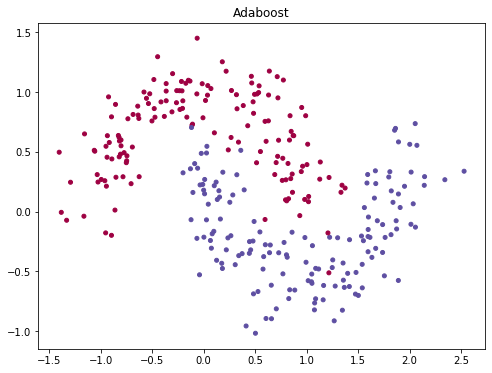

In [323]:
# 读入iris数据
np.random.seed(0)
X, y = datasets.make_moons(300, noise=0.20)
plt.figure(1, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=16, c=y, cmap=plt.cm.Spectral)
plt.title('Adaboost')

In [316]:
# adaboost svm
abc_svm = AdaBoostClassifier(SVC(C=10, kernel='poly',gamma='auto'),
                         algorithm="SAMME",
                         n_estimators=45,
                         learning_rate=0.15)
abc_svm.fit(X, y)
y_pred = abc_svm.predict(X)
acc = metrics.accuracy_score(y, y_pred)
print('adaboost accuracy: ', acc)

adaboost accuracy:  0.9066666666666666


(-1.9025825471194273,
 3.017417452880577,
 -1.5172614127795365,
 1.9427385872204666)

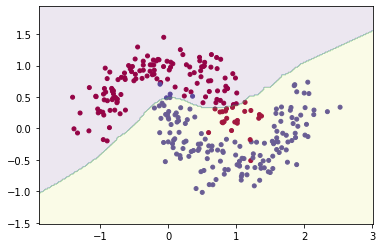

In [317]:
plot_step = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
Z = abc_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X[:, 0], X[:, 1], s=16, c=y, cmap=plt.cm.Spectral)
cs = plt.contourf(xx, yy, Z, alpha=0.1)
plt.axis("tight")

In [335]:
# voting
cf1 = SVC(C=11, probability=True,gamma='auto')
cf2 = SVC(C=10, kernel='linear', probability=True,gamma='auto')
cf3 = SVC(C=10, kernel='poly',degree=8, probability=True,gamma='auto')
cf4 = SVC(C=10, kernel='sigmoid', probability=True,gamma='auto')
#cf5 = SVC(C=10, kernel='precomputed', probability=True,gamma='auto')

vc = VotingClassifier(estimators=[('svc_rbf', cf1), ('svm_linear', cf2),
                                    ('svc_poly', cf3), ('svm_sigmoid', cf4)],
                        voting='soft', weights=[3, 2, 1, 1])
vc.fit(X, y)
y_pred = vc.predict(X)
acc = metrics.accuracy_score(y, y_pred)
print('voting accuracy: ', acc)

voting accuracy:  0.97


(-1.9025825471194273,
 3.017417452880577,
 -1.5172614127795365,
 1.9427385872204666)

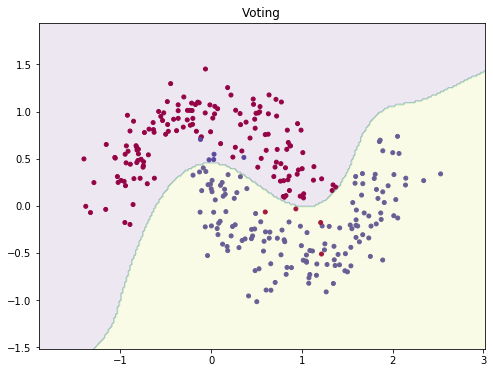

In [336]:
plt.figure(2, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=16, c=y, cmap=plt.cm.Spectral)
plt.title('Voting')
Z = vc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=0.1)
plt.axis("tight")